<a href="https://colab.research.google.com/github/thefarofa/Invest/blob/main/10_API_Banco_Central_do_Brasil_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

# Obtendo Dados através da API do Banco Central do Brasil

In [2]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

# Exemplo de Consultas à API do Banco Central do Brasil

In [3]:
ipca = consulta_bc(433)

In [4]:
igpm = consulta_bc(189)

<Axes: xlabel='data'>

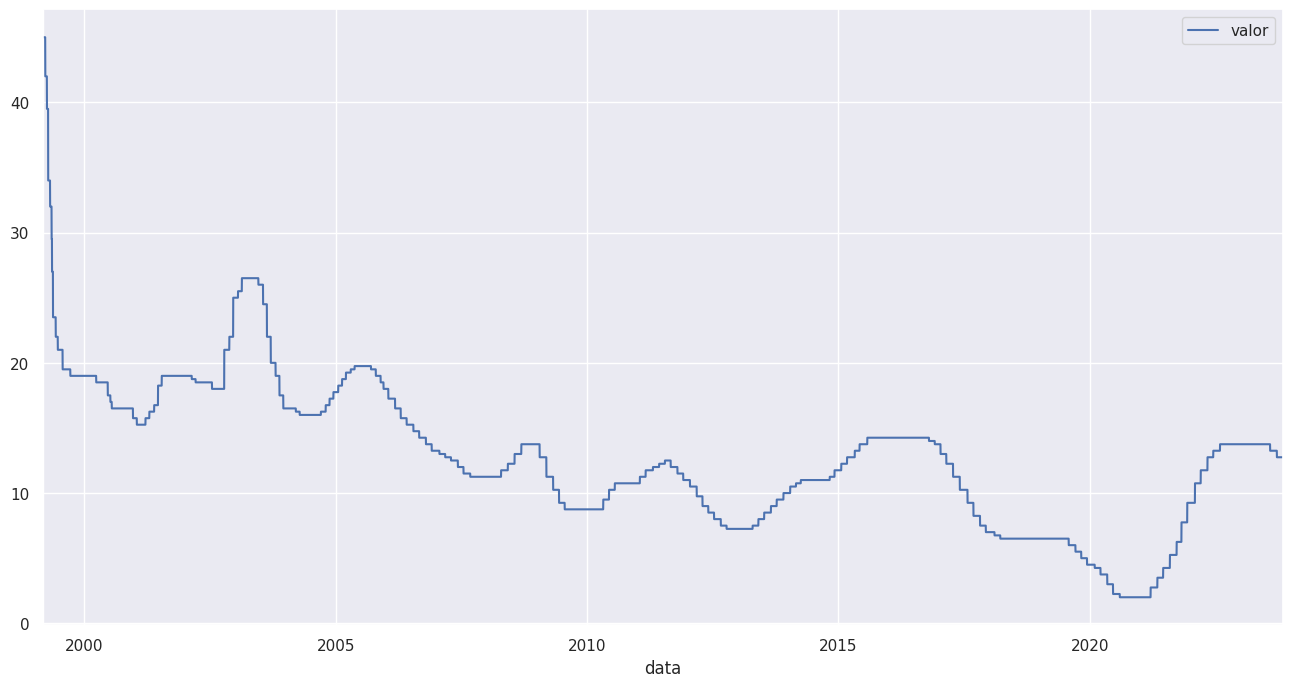

In [5]:
selic_meta = consulta_bc(432)
selic_meta.plot()

In [6]:
reservas_internacionais = consulta_bc(13621)

<Axes: xlabel='data'>

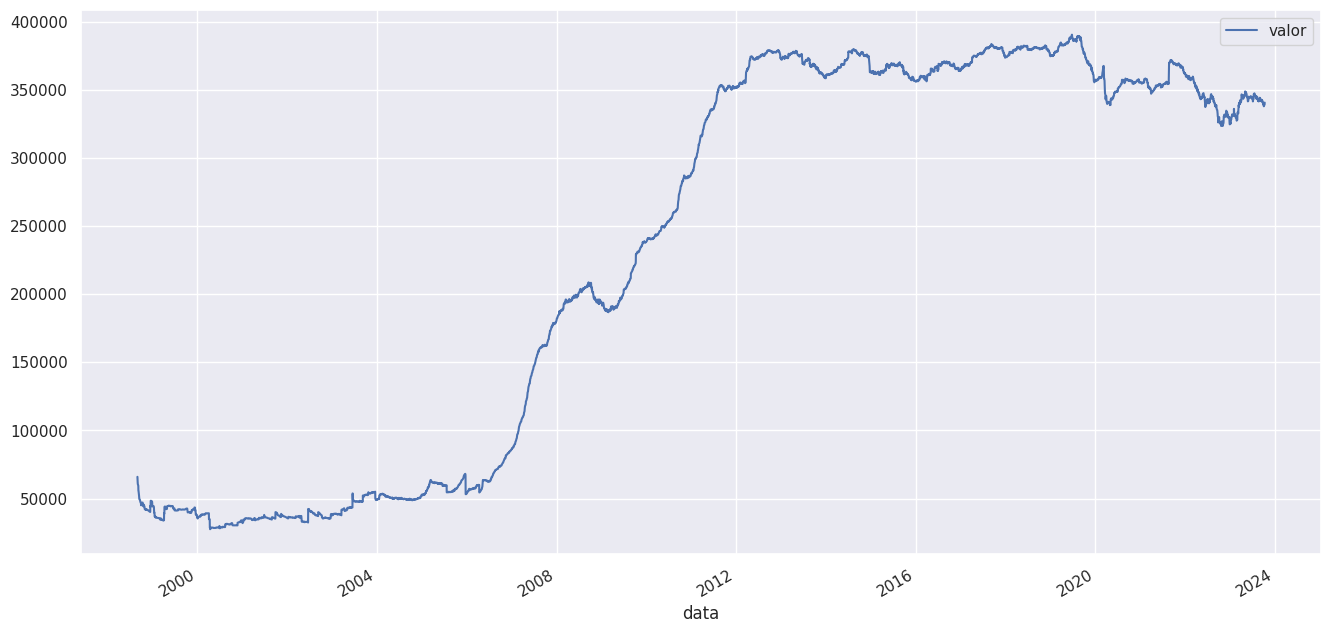

In [7]:
reservas_internacionais.plot()

In [8]:
pnad = consulta_bc(24369)
pnad

,valor
data,
2012-03-01,8.0
2012-04-01,7.8
2012-05-01,7.7
2012-06-01,7.6
2012-07-01,7.5
...,...
2023-03-01,8.8
2023-04-01,8.5
2023-05-01,8.3


# CDI vs IBOV

In [9]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [10]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed


In [11]:
ibov_retorno = ibov.pct_change()

In [12]:
cdi = consulta_bc(12)

In [13]:
data_inicio = '2018-01-01'

In [14]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

In [15]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

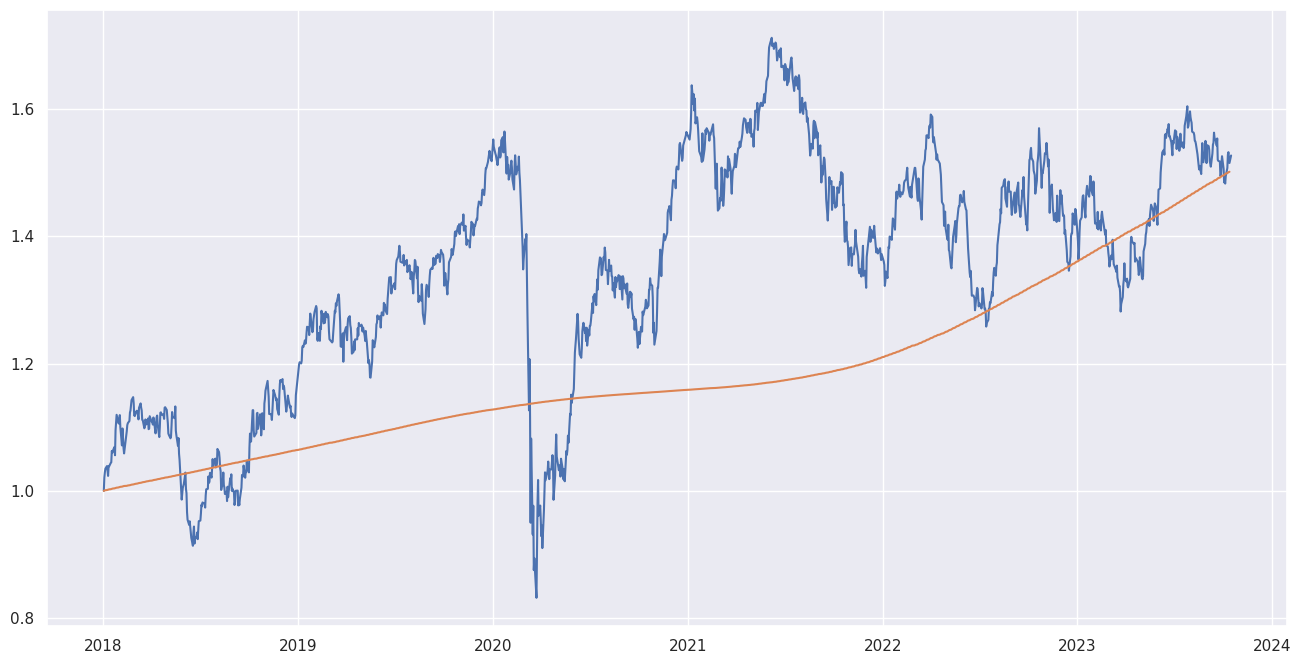

In [16]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);